# Medidas básicas sobre características
## Introducción
Una vez cargados los datos con los que queremos trabajar. El primer paso debería ser examinarlos para conocerlos. Nos servirá para elegir los métodos más adecuados posteriormente y, además, de comprobación para ver que lo que hemos cargado está correcto. Muchas veces en este paso se detectan errores de carga como haber cargado números decimales como si fuesen cadenas o cosas similares.

Como ejemplo, vamos a usar un conjunto de datos (_data set_) muy conocido del [_UCI Machine Learning Repository_](https://archive.ics.uci.edu/). Este fue uno de los primeros repositorios públicos de conjuntos de datos y vereis que aparece citado en muchas publicaciones.

El [_Wine data set_](https://archive.ics.uci.edu/ml/datasets/wine) es un conjunto de un tamaño pequeño pero con suficientes variables de varios tipos y rangos para hacer ejemplos.

En primer lugar, importamos Pandas y cargamos la tabla. En este caso la tenemos en un formato tipo csv que usa una coma como separador con espacios o tabuladores para alinear algo las columnas si lo abrimos en un editor de texto. Como veis es muy fácil de cargar con una simple expresión regular.

In [28]:
import pandas as pd

In [29]:
tabla = pd.read_csv('wine.tab', sep='\s*,\s*', engine='python')
tabla

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Nos interesa explorar algunas columnas para ver su tipo y que están correctamente cargadas (a veces el nombre no está bien, por ejemplo si hay espacios que se han confundido con separadores). Podemos explorarlas simplemente haciendo referencia a ellas:

In [30]:
tabla['Wine']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [31]:
tabla['Total phenols']

0      2.80
1      2.65
2      2.80
3      3.85
4      2.80
       ... 
173    1.68
174    1.80
175    1.59
176    1.65
177    2.05
Name: Total phenols, Length: 178, dtype: float64

En este conjunto de datos, cada una de las filas representa una muestra de vino. La primera característica es la clase a la que pertenece. Esta será la variable dependiente que queremos predecir. Las demás características las consideraremos las variables independientes o predictoras. Esta información la sabemos por la descripción del conjunto de datos. Realmente podríamos usar otras variables como dependientes y tratar de predecirlas con las demás pero el uso normal de este _data set_ es el descrito. 

En nuestros problemas, tendremos que ser nosotros los que identifiquemos qué nos interesa predecir, cual o cuales será/n la/s variable/s dependiente/s. De la misma forma, no siempre todas las características podrán usarse como variables predictoras. Es habitual encontrar características que son identificadores (tienen un valor distinto para cada elemento, ejemplo: un número de pasaporte). Nos pueden servir para enlazar datos con otras tablas o identificar un elemento problemático del que nos podría interesar tomar nuevas mediciones porque sospechamos que ha habido algún error. Sin embargo, si se nos cuela un identificador en un sistema de aprendizaje, los resultados pueden ser extraños. El sistema puede aprender de memoria los objetos por su identificador y no será capaz de extrapolar ese conocimiento a otros elementos, que tendrán por definición un identificador diferente.

Vamos a introducir un identificador inventado para detectarlo luego:

In [32]:
import random
import numpy as np
random_value = random.randint(1000,5000) # Un número alto para que el identificador parezca de datos grandes
random_different_values = np.array(list(range(random_value, random_value + len(tabla)))) * random.randint(5,30)
random.shuffle(random_different_values)
tabla['id'] = random_different_values
tabla

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,58328
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,58627
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,56373
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,58443
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,55361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,58719
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,58995
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,58098
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,59041


Nota: unas veces utilizamos el término _variable_ y otras _característica_. Desde el punto de vista del científico de datos serán normalmente lo mismo. En contextos de estadística, se suele usar más el término _variable_ (independiente o predictora, dependiente, ...). Sin embargo, en contextos más informáticos, se suele usar más el término _característica_ para distingirlo del concepto de variable de los lenguajes de programación. Aquí, normalmente usaremos, _característica_ para referirnos a los valores de los objetos (a las columnas de la tabla de datos) y _variable_ para referirnos al concepto de la variable aleatoria teórica que representa como pueden variar los valores de ese atributo o caracteristica del objeto. En resumen, _característica_ para los datos y _variable_ para los modelos.

# Medidas básicas
Como habéis visto (o veréis) en la asignatura de introducción a los lenguajes de programación, se pueden aplicar las funciones universales de Numpy sobre los objetos de Pandas. Así, podemos sacar la media de los valores de una característica.
![ilustración de una agregación, resumiendo una columna de una tabla en un valor](https://pandas.pydata.org/docs/_images/06_aggregate.svg)

 Por ejemplo, la media del contenido de alcohol de todos los vinos:

In [33]:
tabla['Alcohol'].mean()

13.00061797752809

También podemos sacar la media de varias o todas las columnas a la vez. En ese caso, el resultado será un objeto de tipo Series de Pandas.
![la media de varias columnas genera una serie de Pandas](https://pandas.pydata.org/docs/_images/06_reduction.svg)

In [34]:
tabla[['Alcohol','Ash']].mean()

Alcohol    13.000618
Ash         2.366517
dtype: float64

In [35]:
tabla.mean()

Wine                                1.938202
Alcohol                            13.000618
Malic acid                          2.336348
Ash                                 2.366517
Alcalinity of ash                  19.494944
Magnesium                          99.741573
Total phenols                       2.295112
Flavanoids                          2.029270
Nonflavanoid phenols                0.361854
Proanthocyanins                     1.590899
Color intensity                     5.058090
Hue                                 0.957449
OD280/OD315 of diluted wines        2.611685
Proline                           746.893258
id                              57258.500000
dtype: float64

En este resultado habrá cosas que no tendrán mucho sentido. Por ejemplo, la columna Wine son categorías de tipos de vinos. La media no nos dice nada útil (podemos saber que hay más objetos de clase 1 que de clase 3 porque la media es inferior a 2 pero esta sería una forma muy enrevesada de averiguarlo y, si fuesen más clases, menos sabríamos). Tampoco nos sirve de nada la media del identificador pero vamos a ignorarlo de momento, como si no supiesemos lo que es. Desafortunadamente, no es raro encontrarse con unos datos de los que uno no sabe bien lo que significan las características.

De la misma forma podemos sacar otras medidas sobre las características como la desviación típica (_std_), los valores máximo y mínimo, la mediana, quartiles... Ejemplo:

In [36]:
alcohol = tabla['Alcohol']
media = alcohol.mean()
desv_tipica = alcohol.std()
minimo, maximo = alcohol.min(), alcohol.max()
decil, quartile, mediana = alcohol.quantile(0.1), alcohol.quantile(0.25), alcohol.median()
print("""
La caracteristica Alcohol está en el rango [{min},{max}], con 
una media de {med:.2f} y desviación típica de {dev:.2f}. La mediana 
es {mediana:.2f}, su primer quartil {qua:.2f} y su primer decil {decil:.2f}.""".format(
    min=minimo, max=maximo, med=media, dev=desv_tipica, mediana=mediana, qua=quartile, decil=decil))


La caracteristica Alcohol está en el rango [11.03,14.83], con 
una media de 13.00 y desviación típica de 0.81. La mediana 
es 13.05, su primer quartil 12.36 y su primer decil 11.93.


También tenemos el método `describe` que nos da rápidamente un resumen de las medidas estadísticas más destacadas:

In [37]:
tabla['Alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64

In [38]:
tabla.describe()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,id
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,57258.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,1185.151116
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,55223.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,56240.750000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,57258.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,58276.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,59294.000000


Quizá os estéis preguntando para que está incluida la medida `count` si el valor es el mismo para todas las columnas (los 178 valores). En estos datos no aporta mucho pero puede ser importante si hubiese datos perdidos. Por ejemplo, vamos a simular que no se hubiese podido tomar la medida del magnesio para uno de los vinos (ver [How to change ... Pandas Dataframe](https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/) para más información en como cambiar valores de una tabla):

In [39]:
tabla.loc[3, 'Magnesium'] = np.nan
tabla.describe()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,id
count,178.000000,178.000000,178.000000,178.000000,178.000000,177.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.666667,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,57258.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.287895,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,1185.151116
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,55223.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,56240.750000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,57258.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,58276.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,59294.000000


Ahora podemos ver como el `count` nos permite detectar que hay un valor perdido en esa columna.

## Medir según categorias
Las características categoricas nos permiten dividir los datos y, así, es posible ver por encima como influyen los valores de estas características en los demás. Por ejemplo, para ver el valor medio de alcohol en cada una de las categorías de los vinos podemos hacer:



In [56]:
tabla[['Wine', 'Alcohol']].groupby('Wine').mean()

,Alcohol
Wine,
A,13.744746
B,12.278732
C,13.153750


O con todas las características a la vez:

In [57]:
tabla.groupby('Wine').describe()

Alcohol                                                             \
       count       mean       std    min     25%     50%     75%    max   
Wine                                                                      
A       59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83   
B       71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86   
C       48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34   

     Malic acid            ... OD280/OD315 of diluted wines       Proline  \
          count      mean  ...                          75%   max   count   
Wine                       ...                                              
A          59.0  2.010678  ...                         3.42  4.00    59.0   
B          71.0  1.932676  ...                         3.16  3.69    71.0   
C          48.0  3.333750  ...                         1.82  2.47    48.0   

                                                                     
             mean         std    min    25%     50%     75%     max  
Wine                                                                 
A     1115.711864  221.520767  680.0  987.5  1095.0  1280.0  1680.0  
B      519.507042  157.211220  278.0  406.5   495.0   625.0   985.0  
C      629.895833  115.097043  415.0  545.0   627.5   695.0   880.0  

[3 rows x 104 columns]

## Balanceo de clases
Un aspecto importante de los problemas de clasificación es cómo de balanceados están. Esto es, si hay aproximadamente el mismo número de objetos de cada clase o, por contra, hay más de unas clases que de otras. Por ejemplo, los problemas de diagnostico médico suelen ser bastante desbalanceados. Suelen tener muchos más casos negativos que positivos (detectada enfermedad). Sin embargo, es muy importante no equivocarse detectando la enfermedad, aunque sea poco probable. Los modelos de aprendizaje por defecto pueden funcionar mal en estos problemas. Por ello, hay modelos especiales para problemas desbalanceados.

Por tanto, en el preprocesado nos interesará saber como de balanceado está nuestro conjunto de datos. Podemos saber el número de casos de cada clase con:

In [42]:
tabla['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

Y calcularlo en porcentaje con:

In [43]:
tabla['Wine'].value_counts() / len(tabla) * 100

2    39.887640
1    33.146067
3    26.966292
Name: Wine, dtype: float64

En este conjunto de tres clases el balanceado perfecto sería un tercio de casos de cada una, osea un 33%. Podemos ver que está bastante balanceado pero con algo más de casos en la clase 2 y menos en la 3.

## Estructurando el conjunto de datos
Si bien Pandas es bastante versátil y nos ha permitido trabajar con el conjunto de datos tal y como se ha cargado por defecto, hemos visto que por ejemplo hacer la media de la clase no tenía sentido. Para evitarlo y tener el conjunto bien identificado con las estructuras de datos que nos proporciona Pandas, lo suyo sería convertir esa variable a categórica. Podemos ver el tipo de cada columna con:

In [44]:
[(c, tabla[c].dtype) for c in tabla]

[('Wine', dtype('int64')),
 ('Alcohol', dtype('float64')),
 ('Malic acid', dtype('float64')),
 ('Ash', dtype('float64')),
 ('Alcalinity of ash', dtype('float64')),
 ('Magnesium', dtype('float64')),
 ('Total phenols', dtype('float64')),
 ('Flavanoids', dtype('float64')),
 ('Nonflavanoid phenols', dtype('float64')),
 ('Proanthocyanins', dtype('float64')),
 ('Color intensity', dtype('float64')),
 ('Hue', dtype('float64')),
 ('OD280/OD315 of diluted wines', dtype('float64')),
 ('Proline', dtype('int64')),
 ('id', dtype('int64'))]

Podemos ver que la columna 'Wine' está identificada como de tipo entero (de 64bits). Pandas tiene el tipo CategoricalDtype para este tipo de variables que toman una serie de valores limitados. En el siguiente ejemplo vemos como asignarselo a la columna 'Wine'. Para ello debemos considerar si los valores representan algo ordenado, que es lo que tendremos si las clases reflejan varlores difusos como 'Bajo', 'Medio', 'Alto; en los que tenemos claro que hay un orden. Al contrario, cuando tenemos vinos de tres cultivos distintos, no parece que esto exprese ningún orden. Eso lo indicaremos en el parámetro `ordered` como `False`.

In [45]:
tipo_categoria_vino = pd.CategoricalDtype(categories=[1,2,3], ordered=False)
tabla['Wine'] = tabla['Wine'].astype(tipo_categoria_vino)
tabla

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,id
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,58328
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,58627
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,56373
3,1,14.37,1.95,2.50,16.8,NaN,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,58443
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,55361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,58719
174,3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,58995
175,3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,58098
176,3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,59041


Personalmente, no me gusta mucho que los valores de algo no ordenado sean números, podría confundirnos en el futuro. Ser ordenados desde el principio es algo que probablemente agradeceremos después. Lo ideal sería una cadena expresando el cultivo al que pertenece. En este caso los denominaremos A, B y C como ejemplo. Podemos convertirlo con un código rápido así:

In [46]:
tabla['Wine'] = tabla['Wine'].apply(lambda x : 'A' if x == 1 else 'B' if x == 2 else 'C' if x == 3 else x)
tabla['Wine']

0      A
1      A
2      A
3      A
4      A
      ..
173    C
174    C
175    C
176    C
177    C
Name: Wine, Length: 178, dtype: category
Categories (3, object): ['A', 'B', 'C']

¿Y las otras dos características que son de tipo entero? ¿debemos convertirlas también?

Originalmente eran tres las características de tipo entero:

* 'Magnesium' se convirtió automáticamente en flotante (representación de números reales en ordenador) cuando le incluimos el valor desconocido. La razón de esto es que la representación de los número enteros no tiene valor para valores nulos o desconocidos. Realmente no nos afecta mucho porque a efectos prácticos todo lo que se puede representar en los enteros se puede representar en flotantes (* ver nota).

* 'Proline' es de tipo entero y, aunque la podríamos convertir a flotante porque parece una medida de algún valor bien ordenado, tampoco tenemos ningun beneficio por convetirla. Lo único que perderíamos es el saber que no tiene precisión en los decimales (que la medida no se tomó con decimales). Yo la dejaría así. Hay herramientas que probablemente la conviertan automaticamente en flotante más adelante. Scikit-learn hace eso para trabajar con datos homogeneos (todos flotantes).

* 'Id', que la creamos antes para ver si la podíamos distinguir de las demás para descartarla, no tiene ninguna utilidad para el proceso de aprendizaje pero podemos imaginarnos que es un código de barras que identifica la muestra y no queremos perderlo porque nos podría ser útil. En este caso, lo mejor sería identificarlo como cadena que en Pandas sería asignarle el dtype `object`.

Puedes ver [más información sobre los Pandas dtypes](https://pbpython.com/pandas_dtypes.html).

Antes de cambiar la columna 'Id'. Vamos a plantearnos la pregunta: ¿Seríamos capaces de detectar que esta columna es un identificador sin valor para aprendizaje si no lo supiesemos?

La verdad es que puede ser bastante dificíl, sino imposible, detectar algunos identificadores. Sin embargo, hay cosas que nos pueden dar pistas. En las estadísticas de la tabla que sacamos antes, ¿qué diferencias hay entre las columnas 'Proline' y 'Id'? Nos puede llamar la atención que todos los valores de 'Id' son bastante grandes, que los cuartiles están distribuidos aproximadamente a la misma distancia unos de otros. Esto nos sugiere que la distribución de los datos es uniforme. Aunque esto se ve mejor en una gráfica:


(array([[<AxesSubplot:title={'center':'Proline'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'id'}>]], dtype=object))

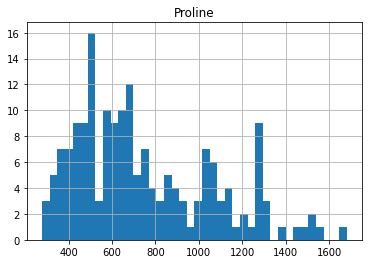

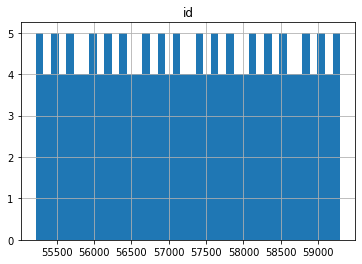

In [47]:
tabla.hist(column='Proline', bins=40), tabla.hist(column='id', bins=40)

Una cosa que siempre se cumple en las características índice es que sus valores son únicos. Por tanto, si hacemos la cuenta de cuantas veces aparece cada valor serán todo unos:

In [48]:
print(list(tabla['id'].value_counts()))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


No es completamente determinante porque una medida con bastante precisión también podría dar todos sus valores distintos pero, en este caso, podemos ver que 'Proline' no es un índice porque no lo cumple: 

In [49]:
print(list(tabla['Proline'].value_counts()))

[5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Como sabemos que es un índice, vamos finalmente a ponerle el tipo `object` como comentamos antes:

In [50]:
tabla['id'] = tabla['id'].astype(object)
[(c, tabla[c].dtype) for c in tabla]

[('Wine', CategoricalDtype(categories=['A', 'B', 'C'], ordered=False)),
 ('Alcohol', dtype('float64')),
 ('Malic acid', dtype('float64')),
 ('Ash', dtype('float64')),
 ('Alcalinity of ash', dtype('float64')),
 ('Magnesium', dtype('float64')),
 ('Total phenols', dtype('float64')),
 ('Flavanoids', dtype('float64')),
 ('Nonflavanoid phenols', dtype('float64')),
 ('Proanthocyanins', dtype('float64')),
 ('Color intensity', dtype('float64')),
 ('Hue', dtype('float64')),
 ('OD280/OD315 of diluted wines', dtype('float64')),
 ('Proline', dtype('int64')),
 ('id', dtype('O'))]

Nuestro conjunto se queda así:

In [51]:
tabla

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,id
0,A,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,58328
1,A,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,58627
2,A,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,56373
3,A,14.37,1.95,2.50,16.8,NaN,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,58443
4,A,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,55361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,C,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,58719
174,C,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,58995
175,C,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,58098
176,C,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,59041


(*) Nota: con números muy grandes los números flotantes pierden precision. Así, mientras que trabajando con enteros lo siguiente es obviamente falso:

In [52]:
(2**60) == (2**60 + 1)

False

Trabajando con flotantes se pierde la precisión que nos permite diferenciar esos dos números tan grandes (ya que parte de los 64 bits se han reservado para el exponente, para una explicación más detallada ver [representación en coma flotante](https://es.wikipedia.org/wiki/Coma_flotante) ):

In [53]:
int(float(2**60)) == int(float(2**60+1))

True

**Ejercicio**: cargar y repetir un proceso similar a este con [otro conjunto de datos para clasificación del repositorio de UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table).

Te puede ser útil la documentación oficial de Pandas, especialmente:

* [How to calculate summary statistics?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html), parte del tutorial centrado en lo que hemos tratado en este tema.

* [API reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html), la referencia para consultar todos los parámetros de todos los métodos y detalles de Pandas.

